In [1]:
from scipy.stats import sem
import numpy as np

In [2]:
input_string = """
1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,0.9,1.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.1,0.0
0,0,0,0,0,0,0,3,1,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4.9990668119597546,5.039967911704268,5.0115321626182885,4.932967072073747,4.938393170623369,5.074290651937366,5.067633166026831,5.9909414627355595,5.388685906420471,4.9599761973196745
5.0090225006664015,5.011397444551434,5.00902354626143,5.003659060785163,5.011369260680472,5.009946904975399,5.009806131587425,5.854253030021798,5.393658532895323,5.008522017330533

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.999004642904639,5.039770702672008,5.011489453769818,4.932796029976134,4.938318420483488,5.074253343186525,5.067466825013289,5.092577137935333,4.965696083419542,4.959820651796723
5.00949689364324,5.011254059732062,5.00931781567968,5.003142928184914,5.010993167572568,5.010297160314879,5.009509200592143,5.008653063006262,5.009614335599789,5.008750715797856

1.0,1.0,0.9,0.7,0.5,0.7,0.8,0.7,1.0,0.8
0.0,0.0,0.1,0.125,0.2857142857142857,0.2222222222222222,0.1111111111111111,0.125,0.0,0.1111111111111111
0,0,1,3,5,3,2,3,0,2
0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0
4.999004642904639,5.039770702672008,5.208411378246749,5.745905826819706,7.942892021630809,5.357290737442768,8.137643482508201,5.26861282223666,4.965696083419542,5.7055531825100125
5.00949689364324,5.011254059732039,5.179982758403888,5.832317866884126,7.908756431007763,5.299754598462316,7.896945809941624,5.193633994573079,5.009614335599785,5.761047409047806


0.9,0.75,1.0,0.85,0.85,1.0,0.8,1.0,1.0,1.0
0.18181818181818182,0.21052631578947367,0.0,0.19047619047619047,0.19047619047619047,0.0,0.2,0.0,0.0,0.0
4,7,0,7,5,0,6,0,0,0
0.16,0.16,0.0,0.16,0.16,0.0,0.16,0.0,0.0,0.0
11.095686651536745,10.97773273329796,10.020481265700342,34.8693840981517,10.96145839887546,10.441173782382108,10.293823334709392,9.956590729960947,9.74290553366649,9.905557015380134
11.047055537497052,11.02009150637412,10.145058766785027,33.91998237896943,11.053568684560737,10.364658378976753,10.316393489828512,10.145420711168246,10.063243497341524,10.0842838834733

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.057571329692498,10.117427202288543,10.047816092732944,9.94005575188664,9.96350259628804,10.536597393745318,10.124675394950954,9.950161322592416,9.745777908089968,9.911272211983421
10.064153335383303,10.099684041710749,10.177253871419103,10.229315372261105,10.05559002838702,10.444504679419918,10.132659173374888,10.14091516817123,10.058571993587385,10.089720356490979

0.7,0.8,0.95,0.7,1.0,0.75,0.9,1.0,0.7,0.9
0.391304347826087,0.2727272727272727,0.05,0.36363636363636365,0.0,0.4827586206896552,0.1,0.0,0.2222222222222222,0.25
13,8,1,12,0,16,3,0,9,7
0.36,0.24,0.04,0.32,0.0,0.56,0.08,0.0,0.16,0.24
62.576209822978846,15.168758858054973,10.13625478959205,46.39594536448742,9.953532423309653,15.145175800416947,10.255772008468009,10.018517001349336,18.945310193817,12.121032470747316
63.369048607550766,15.049968888923601,10.255476816780485,44.85690525040147,10.063795255119711,14.898052962017907,10.284952945110726,10.21388767805704,19.97333130277714,12.39242773058641


0.95,1.0,0.975,0.975,0.975,0.975,1.0,0.95,1.0,1.0
0.11627906976744186,0.024390243902439025,0.025,0.025,0.15217391304347827,0.04878048780487805,0.0,0.15555555555555556,0.0,0.0
6,1,1,1,7,2,0,8,0,0
0.03333333333333333,0.006666666666666667,0.006666666666666667,0.006666666666666667,0.04666666666666667,0.013333333333333334,0.0,0.04666666666666667,0.0,0.0
27.46590151596908,20.78049710720701,21.26909928777772,20.942621517435597,20.805851692201532,20.431304569959106,19.94284320289636,20.8548543656156,20.41105524516543,20.14091868568983
27.912376013224684,20.87196839622989,20.905916030980418,20.438725811436406,20.565580726666767,20.678220610918544,20.363260773709285,20.91441261035901,20.269513966489146,20.1339456537754

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.024390243902439025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,0,0,0,0,0,0,0,0
0.0,0.006666666666666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.52400285427518,20.770657850493446,20.77159341315118,20.719169371219653,20.701211209459917,20.107785621078897,19.949767812384597,20.18042234188115,20.318552913159316,20.133353102323134
20.762541587145506,20.865597936005486,20.465652187540478,20.164577238085958,20.48657195098864,20.355274465810332,20.353616399392145,20.285598248704595,20.217186033295317,20.12410378368224

0.9,0.975,0.675,0.825,1.0,0.875,0.85,1.0,0.975,0.925
0.34545454545454546,0.09302325581395349,0.5645161290322581,0.2826086956521739,0.0,0.2391304347826087,0.3584905660377358,0.0,0.04878048780487805,0.11904761904761904
21,4,41,19,0,14,22,0,2,7
0.12666666666666668,0.02666666666666667,0.23333333333333334,0.08666666666666667,0.0,0.07333333333333333,0.12666666666666668,0.0,0.013333333333333334,0.03333333333333333
23.889222708296234,21.355497965507254,27.89239543328451,55.95065646183168,20.686480256001488,23.67318264104683,28.400155353225585,20.18172119369062,20.508830122777763,21.80733608021983
24.068205101956867,21.500875589488828,28.007214949774287,55.44758651660253,20.468138264701636,23.87454453862104,28.946244666929367,20.268542112695037,20.4306729381496,21.872700311353693

1.0,0.9833333333333333,0.8666666666666667,0.95,1.0,0.95,1.0,0.9666666666666667,0.9833333333333333,0.9833333333333333
0.0,0.04838709677419355,0.2571428571428571,0.16176470588235295,0.01639344262295082,0.14925373134328357,0.0,0.12121212121212122,0.09230769230769231,0.016666666666666666
0,3,20,11,1,11,0,9,6,1
0.0,0.008,0.048,0.029333333333333333,0.0026666666666666666,0.02666666666666667,0.0,0.021333333333333333,0.016,0.0026666666666666666
35.20166732654291,30.736544106433136,31.31166238311842,31.459219866359277,33.532794332671735,31.083859329087975,30.530814426139006,32.7033745565659,31.35812258481862,33.08004773349898
35.20452305418671,31.132992039227666,31.427513312620963,31.691930533517883,34.095932019049876,31.98415171980417,30.596399816562197,32.85985479988534,31.84617848088943,33.30303780243677

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.01639344262295082,0.0,0.0,0.01639344262295082,0.0,0.0
0,0,0,0,1,0,0,1,0,0
0.0,0.0,0.0,0.0,0.0026666666666666666,0.0,0.0,0.0026666666666666666,0.0,0.0
35.21618989848548,30.64812846627484,30.213953746752118,30.54794215859021,34.673171026984,30.756970152361305,30.489381049658203,31.286939113610448,30.767842653404067,31.34823163088997
35.331635768762915,31.024839493123633,30.448127617380514,30.714195893792734,35.096289098646274,31.607663096896825,30.585511571146434,31.43539886069471,31.280111994493616,31.584689078787427

0.9166666666666666,0.9,0.8166666666666667,0.9666666666666667,0.95,0.9666666666666667,0.9,0.9,0.8666666666666667,0.95
0.26666666666666666,0.21739130434782608,0.3950617283950617,0.18309859154929578,0.2191780821917808,0.15942028985507245,0.3076923076923077,0.22857142857142856,0.38095238095238093,0.27848101265822783
21,18,37,13,17,11,29,20,34,22
0.05333333333333334,0.04,0.08533333333333333,0.034666666666666665,0.042666666666666665,0.029333333333333333,0.064,0.042666666666666665,0.08533333333333333,0.058666666666666666
36.59372513360661,32.328301475232735,40.031774087383866,31.185606412951348,63.812586740803546,31.95746243419832,48.72723349520239,44.95689939520353,46.80947803631479,51.44099692924693
36.51831910168952,32.79867415717377,40.47666546565134,31.399602893780923,65.63566572017112,32.84915467095317,49.829315383944234,45.22879130940311,47.51193782036768,52.954699121705914

0.975,0.9375,0.9875,0.9625,1.0,0.925,1.0,0.9625,0.9625,0.9875
0.11363636363636363,0.2647058823529412,0.07058823529411765,0.26666666666666666,0.058823529411764705,0.18681318681318682,0.0,0.04938271604938271,0.09411764705882353,0.05952380952380952
10,29,6,28,5,23,0,5,9,5
0.014285714285714285,0.03857142857142857,0.008571428571428572,0.04,0.007142857142857143,0.024285714285714285,0.0,0.005714285714285714,0.011428571428571429,0.007142857142857143
42.08673495745681,194.4982313449683,41.11729679517961,62.7120210267188,65.17123431827527,75.17514677143176,41.26737773631817,45.446429829315775,41.94972338638117,40.31983709278204
42.2212404617269,192.8809967280092,41.47848900546211,64.51756656535801,66.45036965546129,76.44339585345685,41.425876610950496,45.81449807942889,41.99962870438455,40.78019857579902

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.012345679012345678,0.012345679012345678,0.0,0.0,0.0,0.0
0,0,0,0,1,1,0,0,0,0
0.0,0.0,0.0,0.0,0.0014285714285714286,0.0014285714285714286,0.0,0.0,0.0,0.0
42.229698588227706,41.448144512359555,41.12797923679283,63.53390398174647,43.797771138401465,42.6080972468156,41.251088245157256,41.128958230367026,41.27828013768112,40.25783462518731
42.404180624802606,42.28844641879557,41.429359570054004,65.09701612159748,44.115698779798194,43.31174600880463,41.476795329112534,41.56425535302377,41.296299148037704,40.74344006575417

0.9625,0.95,0.9625,0.8625,0.95,0.8875,0.9125,0.8625,0.875,0.95
0.07228915662650602,0.13636363636363635,0.1348314606741573,0.28865979381443296,0.19148936170212766,0.3486238532110092,0.23958333333333334,0.26595744680851063,0.2708333333333333,0.12643678160919541
7,13,13,34,20,40,25,32,30,12
0.008571428571428572,0.017142857142857144,0.017142857142857144,0.04,0.025714285714285714,0.054285714285714284,0.032857142857142856,0.03571428571428571,0.037142857142857144,0.015714285714285715
44.26538753447594,44.15385417388525,42.144988793222694,162.05188927551683,64.69489763024117,66.58356882021417,48.88877194934357,55.25287906418443,45.780543430066665,41.05482313682391
44.50771679769599,45.06548734400188,42.527321104811385,168.40832392581177,65.51509002472962,68.12731941451013,48.72810949880378,56.14522899023094,45.72848426413515,41.50079094712027

0.89,0.93,0.92,0.96,1.0,0.92,0.83,0.97,0.93,0.96
0.28225806451612906,0.211864406779661,0.12380952380952381,0.1111111111111111,0.009900990099009901,0.10679611650485436,0.39416058394160586,0.0761904761904762,0.19827586206896552,0.04950495049504951
43,29,18,15,1,15,68,8,30,9
0.03111111111111111,0.022222222222222223,0.011555555555555555,0.010666666666666666,0.0008888888888888889,0.009777777777777778,0.048,0.0071111111111111115,0.020444444444444446,0.0044444444444444444
295.19358052534903,186.5235258397808,249.33573118045803,83.21068665946332,51.971319915998144,62.24639422087135,191.30694451550457,51.294049064412455,169.80591252313957,114.75577197522401
284.6286129464129,185.80682523793783,238.9147614889769,86.47187295707622,52.43461289092847,63.01672486765838,191.71650641346326,52.44426522697468,168.01200435339723,115.16074401135907

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0196078431372549,0.0,0.009900990099009901,0.009900990099009901,0.0,0.0,0.0196078431372549,0.009900990099009901,0.0,0.009900990099009901
2,0,1,1,0,0,2,1,0,1
0.0017777777777777779,0.0,0.0008888888888888889,0.0008888888888888889,0.0,0.0,0.0017777777777777779,0.0008888888888888889,0.0,0.0008888888888888889
68.17028133157143,53.107609972901464,56.751558661174684,52.07665624177255,52.7379273735079,54.52565268034447,52.59597211470489,50.10245045330307,56.086209403809505,57.42608990084053
67.79629866384003,53.19427892425898,56.75488400500085,52.624081972180264,53.215024319588046,55.04842035946922,53.24588463039964,51.23621723467505,56.075465065181334,57.5258932149524

0.77,1.0,0.85,0.97,0.96,0.98,0.86,0.92,0.97,0.91
0.28322147651006714,0.0,0.41379310344827586,0.11818181818181818,0.11926605504587157,0.02,0.36764705882352944,0.3611111111111111,0.11818181818181818,0.21551724137931033
48,0,68,13,13,3,55,54,15,29
0.064,0.0,0.05333333333333334,0.011555555555555555,0.011555555555555555,0.0017777777777777779,0.044444444444444446,0.04622222222222222,0.011555555555555555,0.022222222222222223
241.013351098547,54.307018915543345,322.3131685167058,52.78371256303693,53.2415873317156,54.43619489948849,61.33139197093153,59.13109807294405,65.18140579719503,67.66299650305174
265.624848330155,54.36307752048149,310.8361936583472,53.16241811895959,53.766546029706625,54.987382859207294,62.297765252049025,60.84193269576662,65.17774400558248,67.43153262975132

0.9733333333333334,0.96,0.94,0.9733333333333334,0.9333333333333333,0.96,0.92,0.9933333333333333,0.9333333333333333,0.96
0.09316770186335403,0.1377245508982036,0.16568047337278108,0.08176100628930817,0.20454545454545456,0.15294117647058825,0.21142857142857144,0.050955414012738856,0.1566265060240964,0.2
16,26,35,14,41,29,44,8,31,41
0.005714285714285714,0.008761904761904762,0.010666666666666666,0.004952380952380952,0.013714285714285714,0.009904761904761904,0.014095238095238095,0.0030476190476190477,0.009904761904761904,0.013714285714285714
105.22319700205853,95.8195377335409,381.1297693147649,84.36513737247438,192.21041692258999,124.382275014226,204.77788840255485,78.21735835220747,132.96558824776298,239.1455572569935
104.8556598587322,97.00079077588151,393.2701936534739,85.06638306902086,189.53914574599747,125.25474862299343,205.3499852786359,77.71714171923776,135.29436311744828,227.01778430692343

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.006622516556291391,0.013157894736842105,0.006622516556291391,0.0,0.0,0.006622516556291391,0.0,0.0,0.0,0.0
1,2,1,0,0,1,0,0,0,0
0.00038095238095238096,0.0007619047619047619,0.00038095238095238096,0.0,0.0,0.00038095238095238096,0.0,0.0,0.0,0.0
80.1847849045075,79.65945895581213,84.48813379276476,78.80061368110785,81.40796852485275,77.82455437624803,79.09189916959456,77.02787046615288,80.2412183216382,84.6634940131832
80.59159488134416,80.36062229314479,84.31286117329276,79.48391026551555,81.95545101502914,78.53490296106605,79.2928248887951,76.59884311728877,80.53714104333191,84.55105559076458

0.9466666666666667,0.9466666666666667,0.96,0.9533333333333334,0.9066666666666666,0.9066666666666666,0.98,0.9733333333333334,0.9466666666666667,0.9533333333333334
0.18857142857142858,0.30392156862745096,0.13253012048192772,0.08917197452229299,0.31313131313131315,0.30256410256410254,0.08125,0.12048192771084337,0.1839080459770115,0.1588235294117647
37,66,22,17,70,65,14,21,34,31
0.012571428571428572,0.02361904761904762,0.008380952380952381,0.005333333333333333,0.02361904761904762,0.022476190476190476,0.004952380952380952,0.007619047619047619,0.01219047619047619,0.010285714285714285
85.29848850676484,170.2839747001005,92.37189205418753,82.70710793982268,203.98569809819037,89.33168413796693,81.56682203372657,77.86389814913329,89.43337602751083,140.0355541659812
85.86046894458147,170.38346738207346,92.99870181265149,83.31457696253305,199.51413959185618,90.10079894922272,81.80792142120296,77.54197327781216,90.69078051473062,135.35796587106492

0.95,0.93,0.95,0.97,0.95,0.96,0.905,0.92,0.935,0.92
0.14798206278026907,0.20512820512820512,0.15178571428571427,0.0673076923076923,0.1703056768558952,0.1759656652360515,0.22317596566523606,0.24279835390946503,0.242914979757085,0.2784313725490196
40,61,42,15,47,44,64,72,68,86
0.006947368421052632,0.010105263157894737,0.007157894736842105,0.0029473684210526317,0.008210526315789474,0.00863157894736842,0.010947368421052631,0.012421052631578947,0.01263157894736842,0.014947368421052631
241.4965449932976,430.2764010009957,316.58359437244656,112.87221625641202,229.38235703535946,222.49821408536164,640.5380591713706,246.634479505169,271.39099499046097,452.67945710133677
240.0694029758289,433.68564497876497,320.242006016483,114.17664851124141,223.54370445208488,225.86023348804534,642.6789431990222,253.21202603831014,265.70721901158066,459.76652950756085

1.0,1.0,0.995,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.009900990099009901,0.014778325123152709,0.02926829268292683,0.024390243902439025,0.0430622009569378,0.004975124378109453,0.014778325123152709,0.024390243902439025,0.0,0.024390243902439025
2,3,7,5,9,1,3,5,0,5
0.0004210526315789474,0.0006315789473684211,0.0012631578947368421,0.0010526315789473684,0.001894736842105263,0.0002105263157894737,0.0006315789473684211,0.0010526315789473684,0.0,0.0010526315789473684
109.67799608875323,106.3688703537428,119.908084889568,108.02699318125484,108.92217154258553,103.86624716968785,116.4576699639139,107.26219597899549,106.17873730189447,112.77946265343202
110.03379803165035,107.00267482765878,121.53454643452923,109.20795786749838,108.71202069792048,103.79680534719465,116.82790289298956,108.56833351601921,106.63417327227233,112.61895407283541

0.99,0.95,0.955,0.955,0.96,0.99,0.965,0.94,0.97,0.985
0.07476635514018691,0.20502092050209206,0.1940928270042194,0.13963963963963963,0.12727272727272726,0.05714285714285714,0.18220338983050846,0.2033898305084746,0.13777777777777778,0.1085972850678733
16,54,49,33,32,12,44,53,32,26
0.003368421052631579,0.01031578947368421,0.00968421052631579,0.006526315789473684,0.005894736842105263,0.0025263157894736842,0.009052631578947368,0.010105263157894737,0.006526315789473684,0.0050526315789473685
120.27730059326655,320.08406097235496,120.76733523860803,117.92340643952039,115.19163577475626,106.8710212171648,130.5304182542605,120.25330573190318,113.38315000894653,143.00612019423238
121.0182856545704,325.55751967317616,122.33750226350087,119.61907800956489,115.58394996131545,107.00763847771542,130.87482058130834,121.95800285603583,114.19102200639287,143.76453052465808"""

In [3]:
means = []
sems = []

for line in input_string.split("\n"):
    if len(line) > 0:
        numbers = line.split(",")
        n_int = [float(n) for n in numbers]
        
        mean = np.mean(n_int)
        se = sem(n_int)
        
        means.append(mean)
        sems.append(se)

In [4]:
results_omp_mean = [[], [], [], [], [], []]
results_omp_sem = [[], [], [], [], [], []]
results_notears_mean = [[], [], [], [], [], []]
results_notears_sem = [[], [], [], [], [], []]
results_mcmc_mean = [[], [], [], [], [], []]
results_mcmc_sem = [[], [], [], [], [], []]

for i, (mean, se) in enumerate(zip(means, sems)):
    if (i // 6) % 3 == 0:
        results_notears_mean[i % 6].append(mean)
        results_notears_sem[i % 6].append(se)
    elif (i // 6) % 3 == 1:
        results_mcmc_mean[i % 6].append(mean)
        results_mcmc_sem[i % 6].append(se)
    elif (i // 6) % 3 == 2:
        results_omp_mean[i % 6].append(mean)
        results_omp_sem[i % 6].append(se)
        

In [5]:
import matplotlib.pyplot as plt

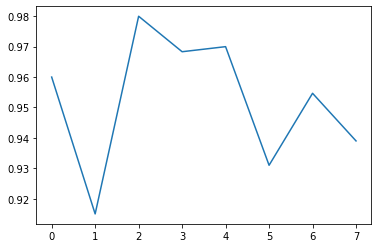

In [78]:
plt.plot(results_notears_mean[0])

0 0
1 0
2 0
0 1
1 1
2 1


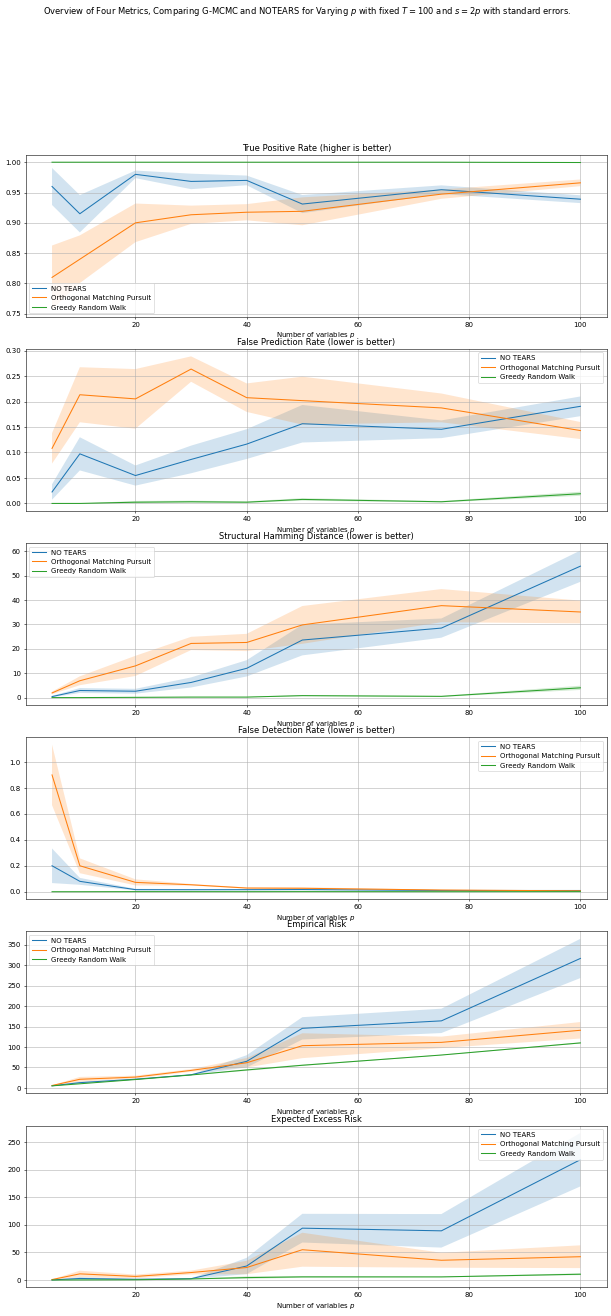

In [16]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 50

fig, axs = plt.subplots(6, 1, figsize = (15, 30))
fig.suptitle("Overview of Four Metrics, Comparing G-MCMC and NOTEARS for Varying $p$ with fixed $T = 100$ and $s = 2p$ with standard errors.")
titles = ['True Positive Rate (higher is better)', 'False Prediction Rate (lower is better)', 'Structural Hamming Distance (lower is better)', 'False Detection Rate (lower is better)', 'Empirical Risk', 'Expected Excess Risk']
Ps = [5, 10, 20, 30, 40, 50, 75, 100]

for i in range(6):
    print(i % 3, i // 3)
    axs[i % 6].grid(visible = True)
    axs[i % 6].plot(Ps, results_notears_mean[i] - np.array(Ps) * (i == 5), label = "NO TEARS")
    axs[i % 6].fill_between(Ps, np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_notears_sem[i]), np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_notears_sem[i]), alpha = 0.2)

    axs[i % 6].plot(Ps, results_omp_mean[i] - np.array(Ps) * (i == 5), label = "Orthogonal Matching Pursuit")
    axs[i % 6].fill_between(Ps, np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_omp_sem[i]), np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_omp_sem[i]), alpha = 0.2)

    axs[i % 6].plot(Ps, results_mcmc_mean[i] - np.array(Ps) * (i == 5), label = "Greedy Random Walk")
    axs[i % 6].fill_between(Ps, np.array(results_mcmc_mean)[i, :] - np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), np.array(results_mcmc_mean)[i, :] + np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), alpha = 0.2)    
    axs[i % 6].set_title(titles[i])
    
    axs[i % 6].legend()
    
for ax in axs.flat:
    ax.set(xlabel='Number of variables $p$', ylabel='')

In [ ]:
fig, axs = plt.subplots(3, 2, figsize = (20, 15))
fig.suptitle("Overview of Four Metrics, Comparing G-MCMC and NOTEARS for Varying $p$ with fixed $T = 100$ and $s = 2p$ with standard errors.")
titles = ['True Positive Rate (higher is better)', 'False Prediction Rate (lower is better)', 'Structural Hamming Distance (lower is better)', 'False Detection Rate (lower is better)', 'Empirical Risk', 'Expected Excess Risk']
Ps = [5, 10, 20, 30, 40, 50, 75, 100]

for i in range(6):
    print(i % 3, i // 3)
    axs[i % 3, i // 3].grid(visible = True)
    axs[i % 3, i // 3].plot(Ps, results_notears_mean[i] - np.array(Ps) * (i == 5), label = "NO TEARS")
    axs[i % 3, i // 3].fill_between(Ps, np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_notears_sem[i]), np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_notears_sem[i]), alpha = 0.2)

    axs[i % 3, i // 3].plot(Ps, results_omp_mean[i] - np.array(Ps) * (i == 5), label = "Orthogonal Matching Pursuit")
    axs[i % 3, i // 3].fill_between(Ps, np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_omp_sem[i]), np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_omp_sem[i]), alpha = 0.2)

    axs[i % 3, i // 3].plot(Ps, results_mcmc_mean[i] - np.array(Ps) * (i == 5), label = "Greedy Random Walk")
    axs[i % 3, i // 3].fill_between(Ps, np.array(results_mcmc_mean)[i, :] - np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), np.array(results_mcmc_mean)[i, :] + np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), alpha = 0.2)    
    axs[i % 3, i // 3].set_title(titles[i])
    
    axs[i % 3, i // 3].legend()
    
for ax in axs.flat:
    ax.set(xlabel='Number of variables $p$', ylabel='')

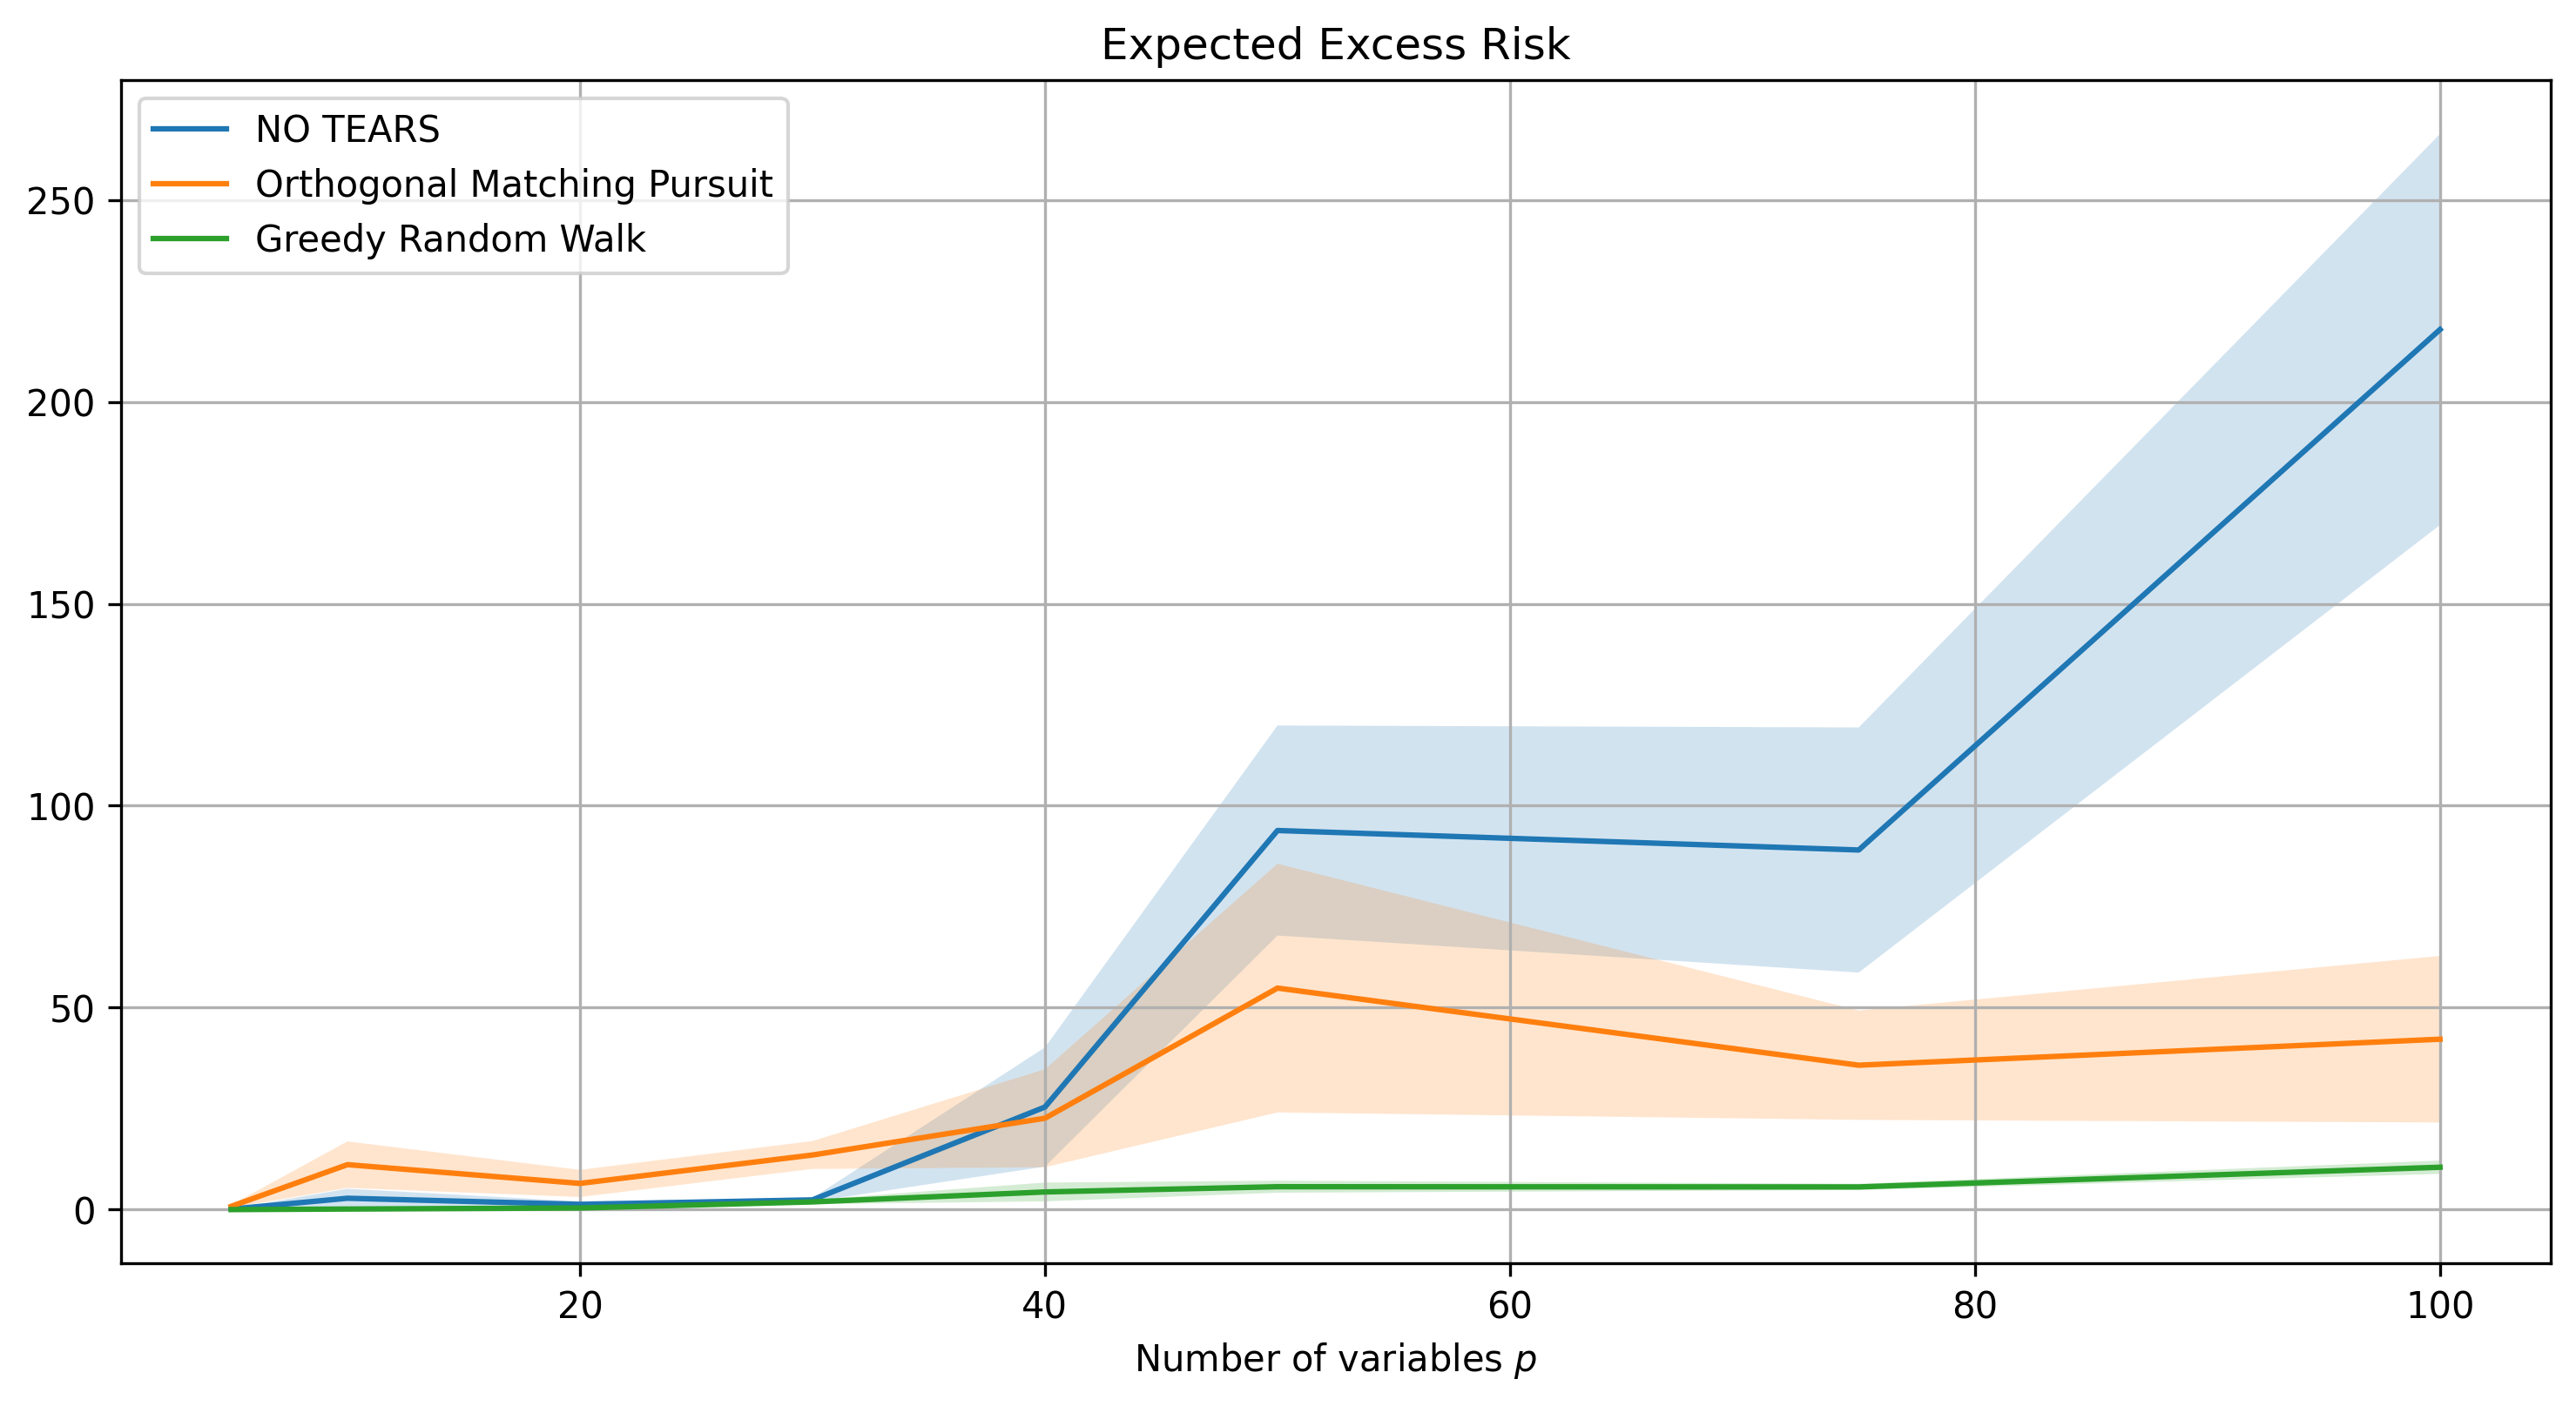

In [102]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

i = 5
plt.figure(figsize = (12, 6))
plt.grid(visible = True)
plt.plot(Ps, results_notears_mean[i] - np.array(Ps) * (i == 5), label = "NO TEARS")
plt.fill_between(Ps, np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_notears_sem[i]), np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_notears_sem[i]), alpha = 0.2)

plt.plot(Ps, results_omp_mean[i] - np.array(Ps) * (i == 5), label = "Orthogonal Matching Pursuit")
plt.fill_between(Ps, np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_omp_sem[i]), np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_omp_sem[i]), alpha = 0.2)

plt.plot(Ps, results_mcmc_mean[i] - np.array(Ps) * (i == 5), label = "Greedy Random Walk")
plt.fill_between(Ps, np.array(results_mcmc_mean)[i, :] - np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), np.array(results_mcmc_mean)[i, :] + np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), alpha = 0.2)  
plt.title("Expected Excess Risk")
plt.xlabel(r"Number of variables $p$")
plt.legend(loc = 2)